# 2024년 가상의 전자상거래 데이터셋

In [24]:
import pandas as pd

df = pd.read_csv("ecommerce_dataset_updated.csv")

df

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


단순 확인 시 결측치 없음

In [26]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


가격은 10-500루피 까지 다양한 가격대를 형성\
할인율은 최대 50%까지 진행

In [27]:
len(df['Product_ID'].unique())

3660

3660개의 고유한 상품에 대한 데이터셋

In [28]:
len(df['Category'].unique())

7

상품 카테고리는 7개로 구성

In [29]:
len(df['User_ID'].unique())

3660

3660명의 이용자가 각각 다른 제품을 구매한 데이터 셋임을 확인.

따라서 이용자의 고유지표 대신 제품의 지표를 분석하기로 함.

# 카테고리별 총매출 분석

카테고리 별 판매금액과 종합적인 할인율

In [34]:
Category = df[['Category', 'Price (Rs.)', 'Final_Price(Rs.)']].copy()
Category = Category.groupby('Category').sum().reset_index()
Category['D.C(%)'] = (1 - Category['Final_Price(Rs.)'] / Category['Price (Rs.)']) * 100
Category

,Category,Price (Rs.),Final_Price(Rs.),D.C(%)
0,Beauty,127633.04,104215.10,18.347867
1,Books,138371.71,111149.35,19.673357
2,Clothing,139714.55,115314.84,17.463972
3,Electronics,125320.14,100462.23,19.835527
4,Home & Kitchen,136841.51,110328.08,19.375283
5,Sports,134481.99,108518.79,19.306080
6,Toys,130207.53,107289.69,17.601010


In [53]:
print("최고가격 : ", Category[Category['Price (Rs.)'] == Category['Price (Rs.)'].max()])
print("최저가격 : ", Category[Category['Price (Rs.)'] == Category['Price (Rs.)'].min()])

최고가격 :     Category  Price (Rs.)  Final_Price(Rs.)     D.C(%)
2  Clothing    139714.55         115314.84  17.463972
최저가격 :        Category  Price (Rs.)  Final_Price(Rs.)     D.C(%)
3  Electronics    125320.14         100462.23  19.835527


In [55]:
print("최고매출 : ", Category[Category['Final_Price(Rs.)'] == Category['Final_Price(Rs.)'].max()])
print("최저매출 : ", Category[Category['Final_Price(Rs.)'] == Category['Final_Price(Rs.)'].min()])

최고매출 :     Category  Price (Rs.)  Final_Price(Rs.)     D.C(%)
2  Clothing    139714.55         115314.84  17.463972
최저매출 :        Category  Price (Rs.)  Final_Price(Rs.)     D.C(%)
3  Electronics    125320.14         100462.23  19.835527


In [56]:
print("최고할인율 : ", Category[Category['D.C(%)'] == Category['D.C(%)'].max()])
print("최저할인율 : ", Category[Category['D.C(%)'] == Category['D.C(%)'].min()])

최고할인율 :        Category  Price (Rs.)  Final_Price(Rs.)     D.C(%)
3  Electronics    125320.14         100462.23  19.835527
최저할인율 :     Category  Price (Rs.)  Final_Price(Rs.)     D.C(%)
2  Clothing    139714.55         115314.84  17.463972


의류매출은 가장 낮은 할인율을 보이나 가장 높은 매출 성과를 올렸다

반대로 전자기기는 가장 높은 할인율을 보이지만 가장 낮은 매출 성과를 올렸다.

# 의류/전자기기 할인율-매출 관계

In [97]:
Date = df[['Purchase_Date', 'Category', 'Final_Price(Rs.)', 'Discount (%)', 'Payment_Method']].copy()
Date['Purchase_Date'] = pd.to_datetime(Date['Purchase_Date'], dayfirst=True)

Data['Purchase_Date'].dt.year.unique()

array([2024])

2024년에 한정된 판매 기록이므로 월 이외의 날짜를 전부 삭제

In [98]:
Date['Purchase_Date'] = Date['Purchase_Date'].dt.month
Date

,Purchase_Date,Category,Final_Price(Rs.),Discount (%),Payment_Method
0,11,Sports,31.05,15,Net Banking
1,2,Clothing,186.23,20,Net Banking
2,9,Sports,237.76,25,Credit Card
3,4,Toys,129.89,25,UPI
4,9,Beauty,195.84,20,Net Banking
...,...,...,...,...,...
3655,5,Beauty,486.79,0,UPI
3656,11,Toys,180.94,15,Cash on Delivery
3657,8,Home & Kitchen,389.76,0,Net Banking
3658,5,Electronics,313.36,30,UPI


= 의류 카테고리 월별 총매출 =

In [79]:
Date_Clothing = Date[Date['Category'] == 'Clothing'].copy()
Date_Clothing = Date_Clothing[['Purchase_Date', 'Final_Price(Rs.)']]
Date_Clothing = Date_Clothing.groupby('Purchase_Date').sum().reset_index()
Date_Clothing

,Purchase_Date,Final_Price(Rs.)
0,1,10664.28
1,2,10471.59
2,3,12820.30
3,4,15876.86
4,5,8243.46
5,6,8109.12
6,7,9840.52
7,8,8853.21
8,9,9351.98
9,10,11994.27


In [90]:
Date_Clothing_Discount = Date[Date['Category'] == 'Clothing'].copy()
Date_Clothing_Discount = Date_Clothing_Discount[['Purchase_Date', 'Discount (%)']]
Date_Clothing_Discount = Date_Clothing_Discount.groupby('Purchase_Date').mean().reset_index()
Date_Clothing_Discount

,Purchase_Date,Discount (%)
0,1,15.000000
1,2,19.803922
2,3,20.403226
3,4,19.275362
4,5,22.051282
5,6,17.261905
6,7,17.608696
7,8,16.153846
8,9,16.521739
9,10,15.961538


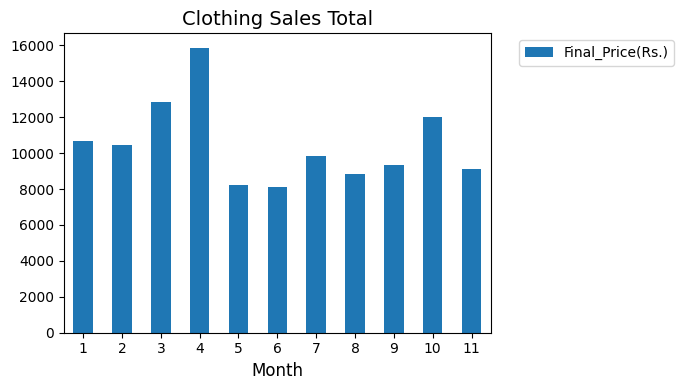

In [121]:
import matplotlib.pyplot as plt

Date_Clothing.plot(kind='bar', x='Purchase_Date', y='Final_Price(Rs.)', figsize=(7, 4))

plt.title('Clothing Sales Total', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

단순 매출 상으로는 3-4월 봄 시즌에 매출이 가장 높게 나타났으며,\
봄대비 시즌인 1-2월에도 매출방어는 나름 성공한 것으로 보임.\
그에 반해 5월 부터는 매출이 급감.

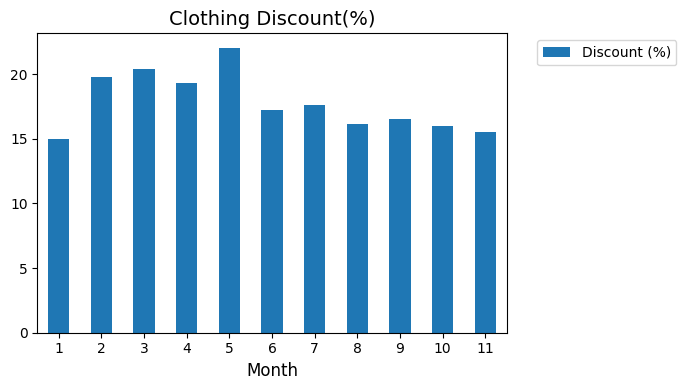

In [120]:
Date_Clothing_Discount.plot(kind='bar', x='Purchase_Date', y='Discount (%)', figsize=(7, 4))

plt.title('Clothing Discount(%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

5월에 가장 큰 할인율을 보이고 있음에도 매출은 가장 낮은 수준임을 보임.\
이미 평균 20% 넘는 할인을 진행하고 있는 상황임으로 더 할인을 진행하기는 어려움.

단, 겨울 의류를 준비하는 시즌인 10월은 할인율이 가장 낮은 수준임에도 매출이 오른 경향을 보임.\
10월 11월 겨울 준비 시즌에 할인율을 소폭 인상하여 겨울맞이 이벤트 진행 시 매출이 더욱 오를 가능성이 존재

In [112]:
Date_Clothing_Pay = Date[Date['Category'] == 'Clothing'].copy()
Date_Clothing_Pay = Date_Clothing_Pay[['Purchase_Date', 'Payment_Method']]
Date_Clothing_Pay = Date_Clothing_Pay.groupby(['Purchase_Date', 'Payment_Method']).size().reset_index(name='count')
Date_Clothing_Pay.head()

,Purchase_Date,Payment_Method,count
0,1,Cash on Delivery,13
1,1,Credit Card,12
2,1,Debit Card,13
3,1,Net Banking,8
4,1,UPI,3


In [134]:
Date_Clothing_Pay_Total = Date[Date['Category'] == 'Clothing'].copy()
Date_Clothing_Pay_Total = Date_Clothing_Pay_Total[['Purchase_Date', 'Payment_Method']]
Date_Clothing_Pay_Total = Date_Clothing_Pay_Total.groupby(['Purchase_Date']).size().reset_index(name='count')

Date_Clothing_Pay_Total['Sales / Count'] = Date_Clothing['Final_Price(Rs.)'] / Date_Clothing_Pay_Total['count']
Date_Clothing_Pay_Total.head()

,Purchase_Date,count,Sales / Count
0,1,49,217.638367
1,2,51,205.325294
2,3,62,206.779032
3,4,69,230.099420
4,5,39,211.370769


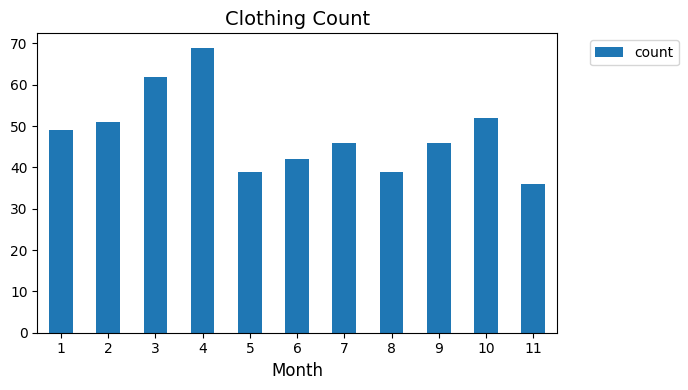

In [137]:
Date_Clothing_Pay_Total.plot(kind='bar', x='Purchase_Date', y='count', figsize=(7, 4))

plt.title('Clothing Count', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

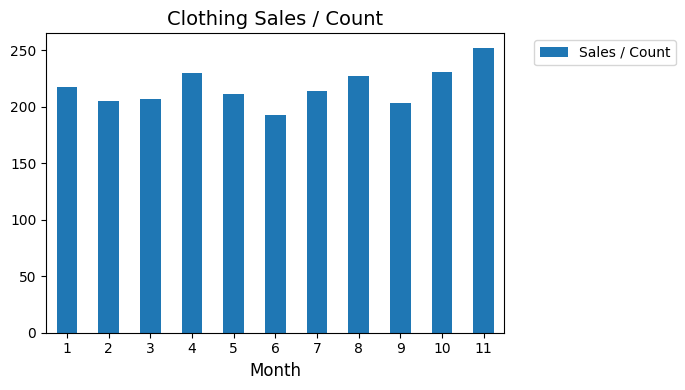

In [135]:
Date_Clothing_Pay_Total.plot(kind='bar', x='Purchase_Date', y='Sales / Count', figsize=(7, 4))

plt.title('Clothing Sales / Count', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

11월은 가장 결제횟수가 가장 적지만, 결제 당 결제 액수는 가장 크게 나타남.\
즉, 11월에 결제 건수를 늘릴 수 있다면 매출 상승에 긍정적인 영향을 줄 수 있음. 

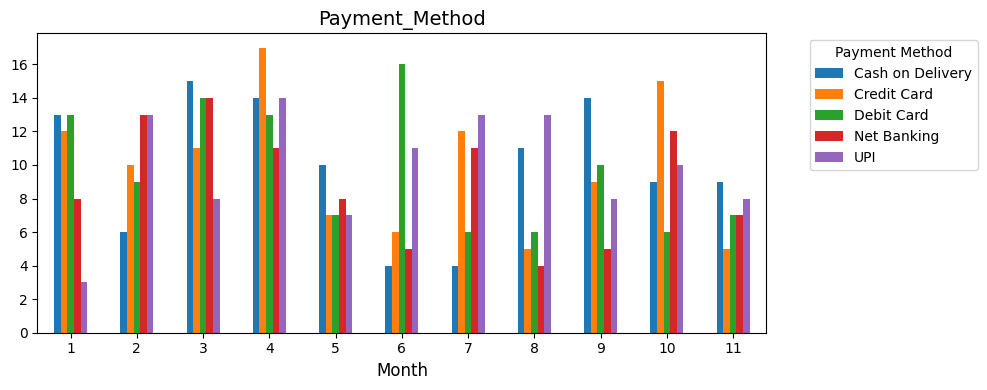

In [128]:
pivot_Clothing = Date_Clothing_Pay.pivot(index='Purchase_Date', columns='Payment_Method', values='count')

pivot_Clothing.plot(kind='bar', figsize=(10, 4))
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.title('Payment_Method', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

의류 매출이 상반기/하반기 기준 가장 높은 4월과 10월은 신용카드를 사용해 결제한 비율이 가장 높음.

반대로 매출이 급감해 최저점을 보이는 6월에는 체크카드를 사용한 결제 비율이 가장 높음.\
또한, 신용카드의 사용비율이 가장 적게 나타남.

신용카드 무이자 할부, 신용카드 제휴 등, 5-6월 여름맞이 이벤트를 이용한다면 매출 증가의 가능성이 존재.

= 전자기기 카테고리 월별 총매출 =

In [93]:
Date_Electronics = Date[Date['Category'] == 'Electronics'].copy()
Date_Electronics = Date_Electronics[['Purchase_Date', 'Final_Price(Rs.)']]
Date_Electronics = Date_Electronics.groupby('Purchase_Date').sum().reset_index()
Date_Electronics

,Purchase_Date,Final_Price(Rs.)
0,1,8439.91
1,2,11238.46
2,3,8216.37
3,4,7747.77
4,5,9453.03
5,6,11638.59
6,7,10889.77
7,8,10592.97
8,9,5321.05
9,10,11613.64


In [94]:
Date_Electronics_Discount = Date[Date['Category'] == 'Electronics'].copy()
Date_Electronics_Discount = Date_Electronics_Discount[['Purchase_Date', 'Discount (%)']]
Date_Electronics_Discount = Date_Electronics_Discount.groupby('Purchase_Date').mean().reset_index()
Date_Electronics_Discount

,Purchase_Date,Discount (%)
0,1,20.581395
1,2,17.127660
2,3,21.382979
3,4,18.095238
4,5,19.574468
5,6,17.500000
6,7,19.237288
7,8,20.918367
8,9,19.642857
9,10,17.807018


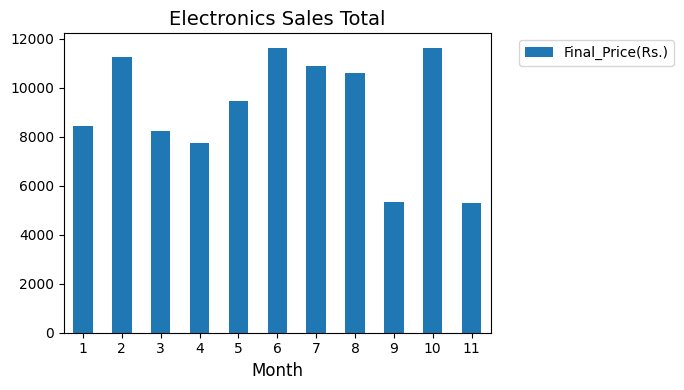

In [119]:
Date_Electronics.plot(kind='bar', x='Purchase_Date', y='Final_Price(Rs.)', figsize=(7, 4))

plt.title('Electronics Sales Total', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

6-8월 여름 시즌에 가장 매출이 높으며, 나머지는 2월과 10월을 제외하면 매출이 크게 감소함.\
특히 9월 11월 시즌에 가장 큰 매출 하락을 보임.

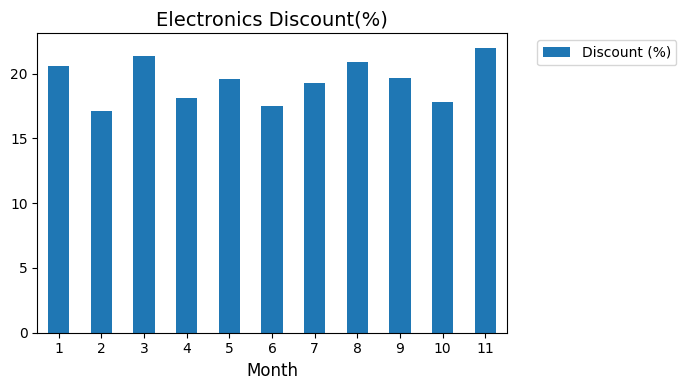

In [122]:
Date_Electronics_Discount.plot(kind='bar', x='Purchase_Date', y='Discount (%)', figsize=(7, 4))

plt.title('Electronics Discount(%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

매출이 가장 높은 2, 6, 10월 달의 할인율은 가장 작은 할인율이며,\
가장 매출이 적은 달 중 하나인 11월의 할인율은 최고점을 보임.\
11월의 할인율을 더 낮추면 매출에 큰 타격이 있으므로 변경하기 어려움.

In [139]:
Date_Electronics_Pay_Total = Date[Date['Category'] == 'Electronics'].copy()
Date_Electronics_Pay_Total = Date_Electronics_Pay_Total[['Purchase_Date', 'Payment_Method']]
Date_Electronics_Pay_Total = Date_Electronics_Pay_Total.groupby(['Purchase_Date']).size().reset_index(name='count')

Date_Electronics_Pay_Total['Sales / Count'] = Date_Electronics['Final_Price(Rs.)'] / Date_Electronics_Pay_Total['count']
Date_Electronics_Pay_Total.head()

,Purchase_Date,count,Sales / Count
0,1,43,196.276977
1,2,47,239.116170
2,3,47,174.816383
3,4,42,184.470714
4,5,47,201.128298


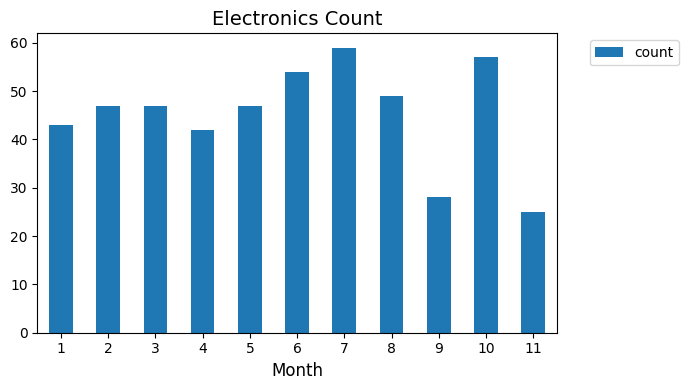

In [140]:
Date_Electronics_Pay_Total.plot(kind='bar', x='Purchase_Date', y='count', figsize=(7, 4))

plt.title('Electronics Count', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

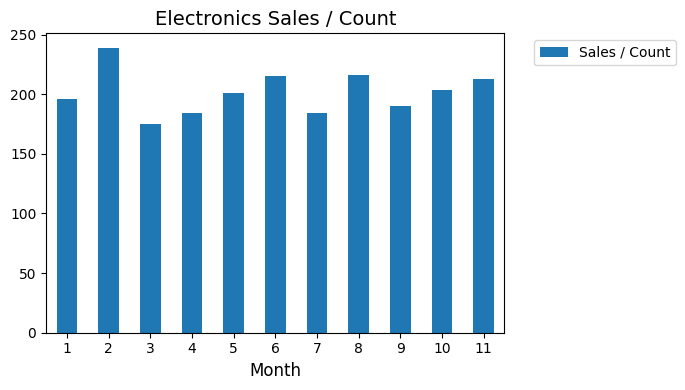

In [141]:
Date_Electronics_Pay_Total.plot(kind='bar', x='Purchase_Date', y='Sales / Count', figsize=(7, 4))

plt.title('Electronics Sales / Count', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

의류 매출과 마찬가지로 전자기기 역시 11월 달에 가장 결제 횟수가 적음.\
또한, 9월과 11월은 결제 횟수 대비 결제액은 매우 높음.\
11월 달의 소비는 전체적으로 적은 편이며, 11월(9월 포함)의 결제 횟수를 늘릴 수 있다면 매출에 긍정적인 영향을 줄 수 있음.

In [124]:
Date_Electronics_Pay = Date[Date['Category'] == 'Electronics'].copy()
Date_Electronics_Pay = Date_Electronics_Pay[['Purchase_Date', 'Payment_Method']]
Date_Electronics_Pay = Date_Electronics_Pay.groupby(['Purchase_Date', 'Payment_Method']).size().reset_index(name='count')
Date_Electronics_Pay.head()

,Purchase_Date,Payment_Method,count
0,1,Cash on Delivery,6
1,1,Credit Card,12
2,1,Debit Card,9
3,1,Net Banking,10
4,1,UPI,6


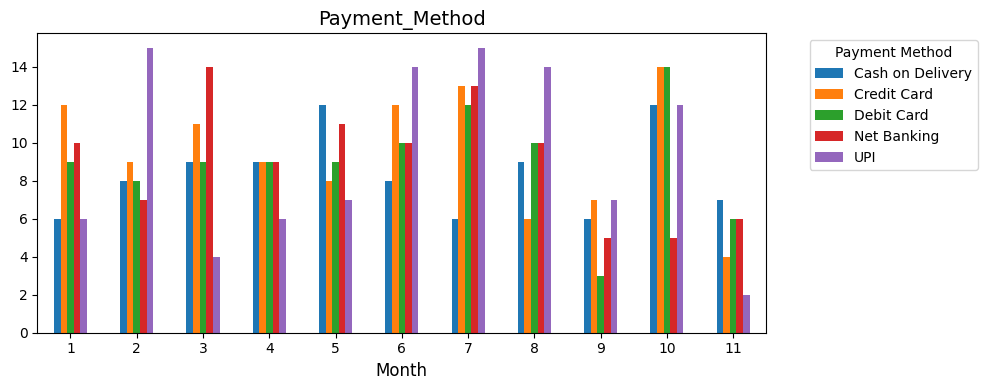

In [127]:
pivot_Electronics = Date_Electronics_Pay.pivot(index='Purchase_Date', columns='Payment_Method', values='count')

pivot_Electronics.plot(kind='bar', figsize=(10, 4))
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.title('Payment_Method', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

매출이 높은 2월, 여름, 10월은 통합 결제 시스템의 이용률이 가장 높음.\
9월을 제외한 나머지는 이 관계가 역전됨을 보임.

UPI와 연동된 이벤트(UPI를 이용해 제품 구매시 0.3% 추가 적립 혹은 1% 추가 할인 등)을 이용하여 매출을 끌어올릴 가능성 존재.

특히 9월과 11월의 경우, 매출 자체 뿐만 아니라 구매횟수 자체가 다른 달에 비해 현저히 적음.\
이를 타개하기 위해 9월과 11월에 할인 등의 금전적 이벤트 뿐 만 아니라 새로운 방안이 필요함.